In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/X-Ray-Based-Lungs-Disease-Detection-main/Splitted Dataset/train'
valid_path = '/content/drive/MyDrive/X-Ray-Based-Lungs-Disease-Detection-main/Splitted Dataset/test'

In [15]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

res152V2 = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
# don't train existing weights
for layer in res152V2.layers:
    layer.trainable = False

In [18]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/X-Ray-Based-Lungs-Disease-Detection-main/Splitted Dataset/train/*')

In [19]:
# our layers - you can add more if you want
x = Flatten()(res152V2.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [20]:
# create a model object
model = Model(inputs=res152V2.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/X-Ray-Based-Lungs-Disease-Detection-main/Splitted Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6073 images belonging to 5 classes.


In [28]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/X-Ray-Based-Lungs-Disease-Detection-main/Splitted Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [29]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-29-3c92dd699ccc>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
95/95 [==============================] - 1981s 21s/step - loss: 2.7707 - accuracy: 0.7235 - val_loss: 1.6995 - val_accuracy: 0.8094
Epoch 2/25
95/95 [==============================] - 208s 2s/step - loss: 1.6614 - accuracy: 0.8080 - val_loss: 1.7796 - val_accuracy: 0.8188
Epoch 3/25
95/95 [==============================] - 210s 2s/step - loss: 1.4101 - accuracy: 0.8434 - val_loss: 1.8760 - val_accuracy: 0.8114
Epoch 4/25
95/95 [==============================] - 203s 2s/step - loss: 1.2850 - accuracy: 0.8566 - val_loss: 2.2121 - val_accuracy: 0.8148
Epoch 5/25
95/95 [==============================] - 209s 2s/step - loss: 1.4637 - accuracy: 0.8599 - val_loss: 3.0551 - val_accuracy: 0.7965
Epoch 6/25
95/95 [==============================] - 203s 2s/step - loss: 1.2705 - accuracy: 0.8753 - val_loss: 3.1468 - val_accuracy: 0.8138
Epoch 7/25
95/95 [==============================] - 205s 2s/step - loss: 1.1775 - accuracy: 0.8841 - val_loss: 2.2446 - val_accuracy: 0.8346
Epoch 8/25


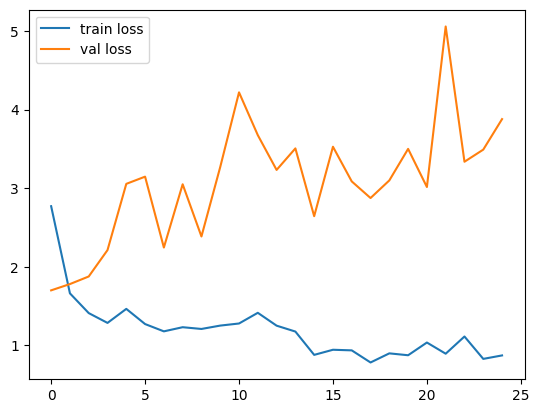

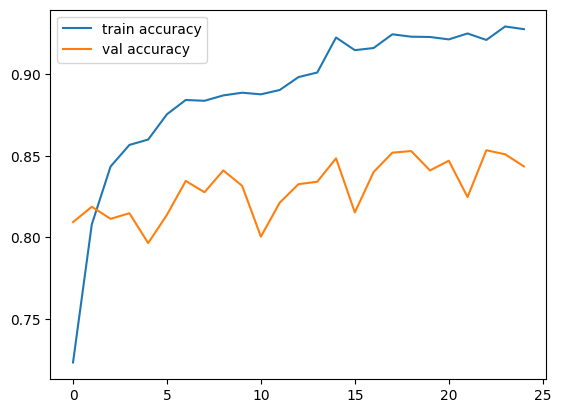

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('vgg16_LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('vgg16_AccVal_acc1.0.jpeg')

In [32]:
# save it as a h5 file

import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('model_res152V2new.h5')